<a href="https://colab.research.google.com/github/Seongjin1225/BigData/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%9D%BC%EB%B3%84_%26_%EC%9B%94%EB%B3%84_%EC%9D%B4%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글폰트깨짐 방지(실행 후 런타임 다시 시작 필요!)
# plt.rcParams['font.family'] = 'NanumGothic'
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,774 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and dire

In [ ]:
# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import folium

In [ ]:
# Raw Data Loading
df_day = pd.read_csv('/content/drive/MyDrive/BigData/응급실+요일별+이용+현황_20241106194303.csv')
df_month = pd.read_csv('/content/drive/MyDrive/BigData/응급실+월별+이용+현황_20241106194448.csv')

In [ ]:
# 데이터 샘플 check

# df_day 역시 2014.1이 1월이 아니라 월요일 의미
df_day.columns

Index(['연령별(1)', '연령별(2)', '성별(1)', '2014', '2014.1', '2014.2', '2014.3',
       '2014.4', '2014.5', '2014.6', '2014.7', '2015', '2015.1', '2015.2',
       '2015.3', '2015.4', '2015.5', '2015.6', '2015.7', '2016', '2016.1',
       '2016.2', '2016.3', '2016.4', '2016.5', '2016.6', '2016.7', '2017',
       '2017.1', '2017.2', '2017.3', '2017.4', '2017.5', '2017.6', '2017.7',
       '2018', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5', '2018.6',
       '2018.7', '2019', '2019.1', '2019.2', '2019.3', '2019.4', '2019.5',
       '2019.6', '2019.7', '2020', '2020.1', '2020.2', '2020.3', '2020.4',
       '2020.5', '2020.6', '2020.7', '2021', '2021.1', '2021.2', '2021.3',
       '2021.4', '2021.5', '2021.6', '2021.7'],
      dtype='object')

# 일별 통계
- 2014 ~ 2019까지 한세트로
- 2020 ~ 2021로 하나 (남여 구분 유무 때문)
- 우선 월별로 묶어서 분석

In [ ]:
df_day

,연령별(1),연령별(2),성별(1),2014,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,...,2020.6,2020.7,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7
0,연령별(1),연령별(2),성별(1),계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
1,연령별(1),연령별(2),성별(1),소계,월요일,화요일,수요일,목요일,금요일,토요일,...,토요일,일요일,소계,월요일,화요일,수요일,목요일,금요일,토요일,일요일
2,합계,소계,계,1408776,203602,184800,182381,180577,186968,213984,...,170322,181034,1107826,162064,148426,147986,148262,153603,167508,179977
3,합계,소계,남자,714946,103338,94148,93119,91504,95108,108396,...,85381,89717,537894,79214,72312,72074,72828,74749,80422,86295
4,합계,소계,여자,693830,100264,90652,89262,89073,91860,105588,...,84941,91317,569932,82850,76114,75912,75434,78854,87086,93682
5,합계,1세미만,계,47576,6327,5994,5957,5760,5860,7929,...,2661,2795,14859,2151,2006,2002,1988,2090,2283,2339
6,합계,1세미만,남자,26507,3504,3368,3293,3161,3277,4432,...,-,-,-,-,-,-,-,-,-,-
7,합계,1세미만,여자,21069,2823,2626,2664,2599,2583,3497,...,-,-,-,-,-,-,-,-,-,-
8,합계,1 - 9세,계,258701,33348,30494,30522,30614,31933,42949,...,16276,18478,85459,11389,10444,10856,10352,10868,14429,17121
9,합계,1 - 9세,남자,148075,19281,17534,17653,17327,18419,24404,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
df_total = df_day[['연령별(1)','연령별(2)','성별(1)','2014','2015','2016','2017','2018','2019','2020','2021']]

# 남여 row drop -> 전체 이용으로 우선 계산 하기 위해
df_total_gen = df_total[3:5]
df_total_gen.set_index('성별(1)', inplace=True)
df_total_gen[['2014','2015','2016','2017','2018','2019','2020','2021']] = df_total_gen[['2014','2015','2016','2017','2018','2019','2020','2021']].apply(pd.to_numeric)
df_total_gen.dtypes


<ipython-input-5-481efceb1d68>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_gen[['2014','2015','2016','2017','2018','2019','2020','2021']] = df_total_gen[['2014','2015','2016','2017','2018','2019','2020','2021']].apply(pd.to_numeric)


,0
연령별(1),object
연령별(2),object
2014,int64
2015,int64
2016,int64
2017,int64
2018,int64
2019,int64
2020,int64
2021,int64


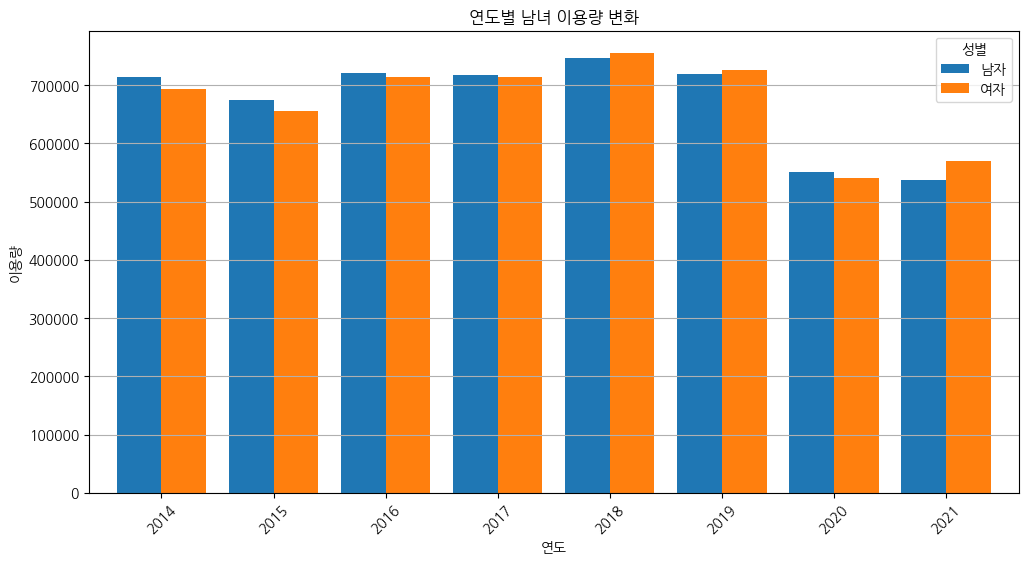

In [ ]:
df_total_gen_see = df_total_gen.loc[:, '2014':'2021']

# 그래프 시각화
plt.rcParams['font.family'] = 'NanumGothic'
df_total_gen_see.T.plot(kind='bar', figsize=(12, 6), width=0.8)  # 전치하여 연도를 x축, 성별을 y축 데이터로 설정
plt.xlabel('연도')
plt.ylabel('이용량')
plt.title('연도별 남녀 이용량 변화')
plt.legend(title='성별')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y')
plt.show()

<ipython-input-6-ebf9438aa746>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dw_t.drop(['연령별(1)','연령별(2)','성별(1)'],axis=1,inplace=True)


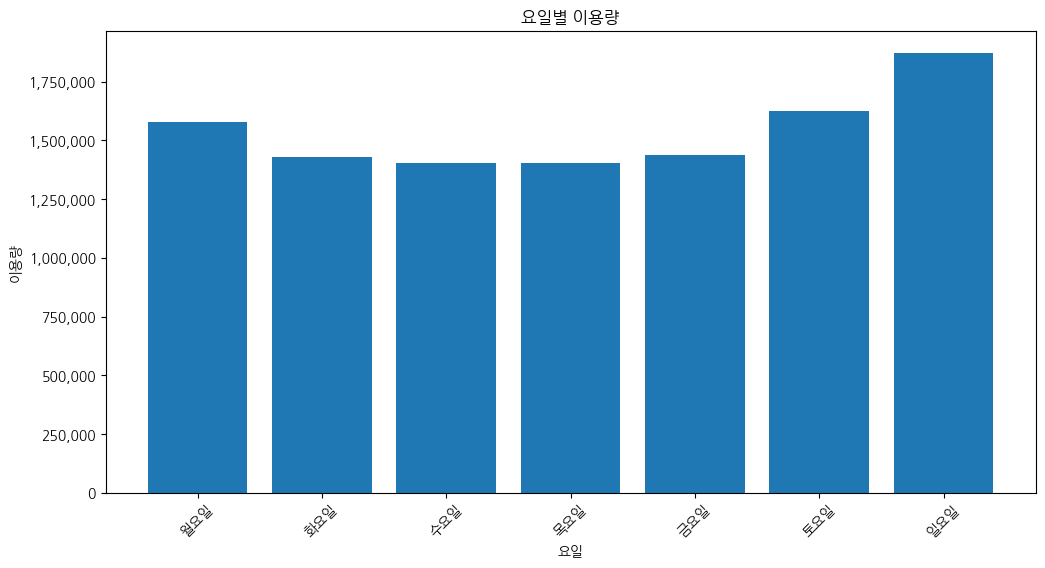

In [ ]:
# 요일별 시각화
df_dw = df_day.drop(['2014','2015','2016','2017','2018','2019','2020','2021'],axis=1)

# 시각화 위해서 데이터프레임 전치
df_dw_t = df_dw.iloc[1:3]
df_dw_t.drop(['연령별(1)','연령별(2)','성별(1)'],axis=1,inplace=True)
df_dw_tr = df_dw_t.transpose()
df_dw_tr
df_dw_tr.rename(columns={1:'요일', 2:'이용량'},inplace=True)
df_dw_tr

# dtype을 int로 변경
df_dw_tr['이용량'] = df_dw_tr['이용량'].astype('int')
df_dw_tr.dtypes


# 남여 구분 x ver.
info = df_dw_tr.groupby('요일').sum()
days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
info = info.reindex(days)
info

import matplotlib.ticker as mticker

plt.figure(figsize=(12, 6))
plt.rcParams['font.family'] = 'NanumGothic'
plt.bar(info.index,info['이용량'])
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('요일별 이용량')
plt.xlabel('요일')
plt.ylabel('이용량')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 요일과 이용량의 상관관계 확인
info = info.reset_index()
info


,요일,이용량
0,월요일,1578773
1,화요일,1430070
2,수요일,1402844
3,목요일,1404788
4,금요일,1439135
5,토요일,1625019
6,일요일,1873429


In [ ]:
# 남여 구분 ver.(2014~2019까지만)
# 2020 ~ 2021 결측치 채우기(0~1 row 따로 빼놨다가 다시 합치는 형식으로 ㄱㄱ)
# 생각해보나까 이거는 나이대 별로 할 때 하면 좋을 듯?(전체 합계는 이미 남여로 다 있으니까)
from sklearn.impute import KNNImputer

df = df_day.drop(['연령별(1)','연령별(2)','성별(1)'],axis=1)

# 문자열 항목들 따로 빼놨다가 합치기
val = df[0:2]
df.drop([0,1],axis=0,inplace=True)
df
df.replace('-', np.nan, inplace=True)

# Imputuation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

# 위에서 따로 빼놓은 문자열 항목들과 합치기
df_imputed = pd.concat([val, df_imputed], ignore_index=True)
df_imputed

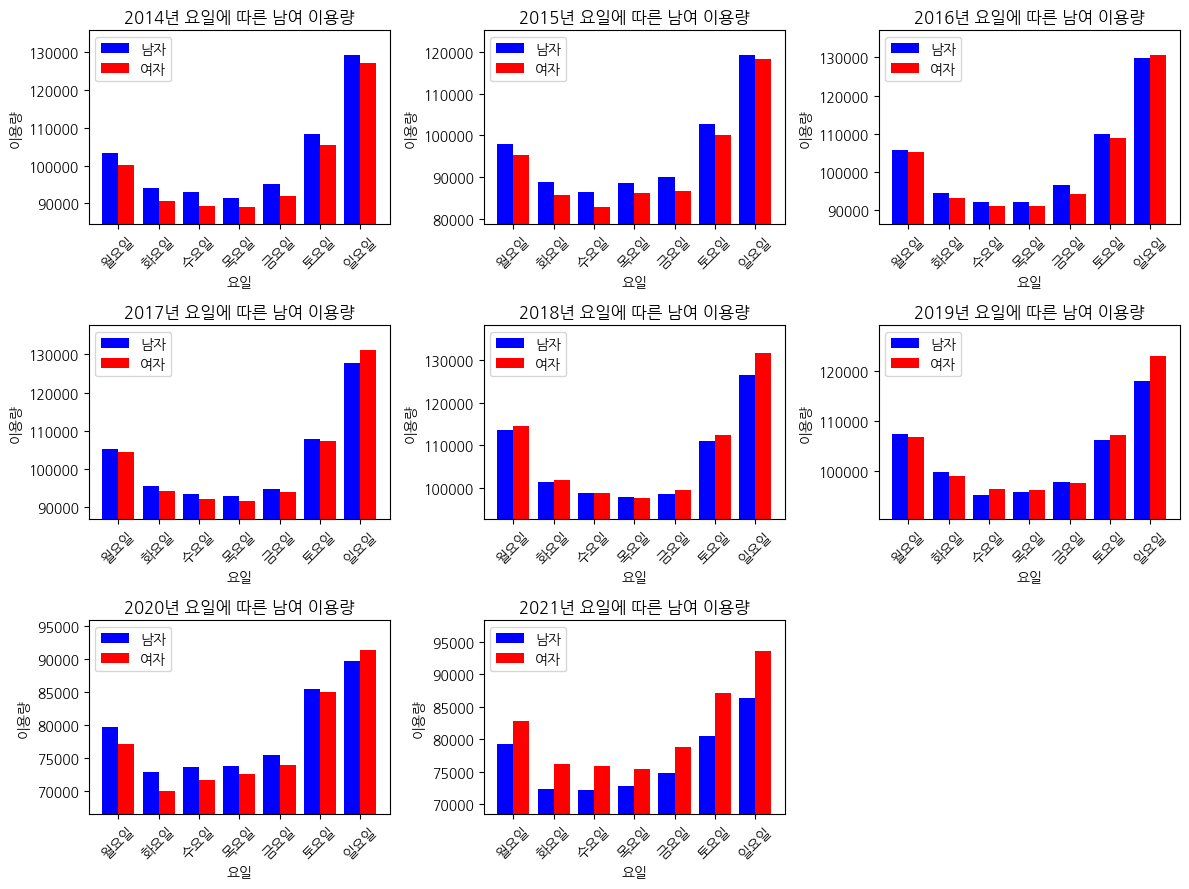

In [ ]:
# 남여 구분 ver. 시각화
# 불필요 컬럼 제거 후 요일, 남, 여 이용자 수만 남김
df_dw_gen = df_day.drop(['연령별(1)','연령별(2)','성별(1)'],axis=1)
df_dw_gen = df_dw_gen[1:5]
df_dw_gen.drop(2,inplace=True)
df_dw_gen.drop(['2014','2015','2016','2017','2018','2019','2020','2021'],axis=1,inplace=True)
df_dw_gen.index = ['요일','남자','여자']

# 데이터프레임 전치 후 groupby
gender = df_dw_gen.transpose()
gender.index = gender.index.str.split('.').str[0].astype(int)
gender = gender.reset_index()
gender = gender.rename(columns={'index': '년도'})

gender_info = gender.groupby(['년도', '요일'])[['남자', '여자']].sum()
gender_info = gender_info.astype('int')

# 요일 index 순서 재배치
day_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
gender_info = gender_info.reindex(
    pd.MultiIndex.from_product([
        gender_info.index.levels[0],   # '년도' 레벨 유지
        day_order                      # 요일 순서대로 정렬된 '요일' 레벨
    ], names=['년도', '요일'])
)

# 시각화
fig = plt.figure(figsize=(12,9))

for i, year in enumerate(gender_info.index.levels[0]):  # '년도' 레벨로 순회
    plt.subplot(3, 3, i+1)
    plt.rcParams['font.family'] = 'NanumGothic'

    # 특정 년도 데이터를 필터링
    data = gender_info.loc[year]

    # x 위치 설정 (요일을 리스트로 사용)
    x = range(len(data.index))
    day_labels = data.index  # 요일 레이블

    # 남성과 여성의 이용량을 나란히 바 형태로 표시
    plt.bar([xi - 0.2 for xi in x], data['남자'], width=0.4, label='남자', color='blue')
    plt.bar([xi + 0.2 for xi in x], data['여자'], width=0.4, label='여자', color='red')
    plt.ylim([data[['남자', '여자']].min().min() * 0.95, data[['남자', '여자']].max().max() * 1.05])

    # 그래프 제목, 축 레이블 설정
    plt.title(f'{year}년 요일에 따른 남여 이용량')
    plt.xlabel('요일')
    plt.ylabel('이용량')
    plt.xticks(x, day_labels, rotation=45)  # x축 레이블을 요일로 설정
    plt.legend()

plt.tight_layout()
plt.show()

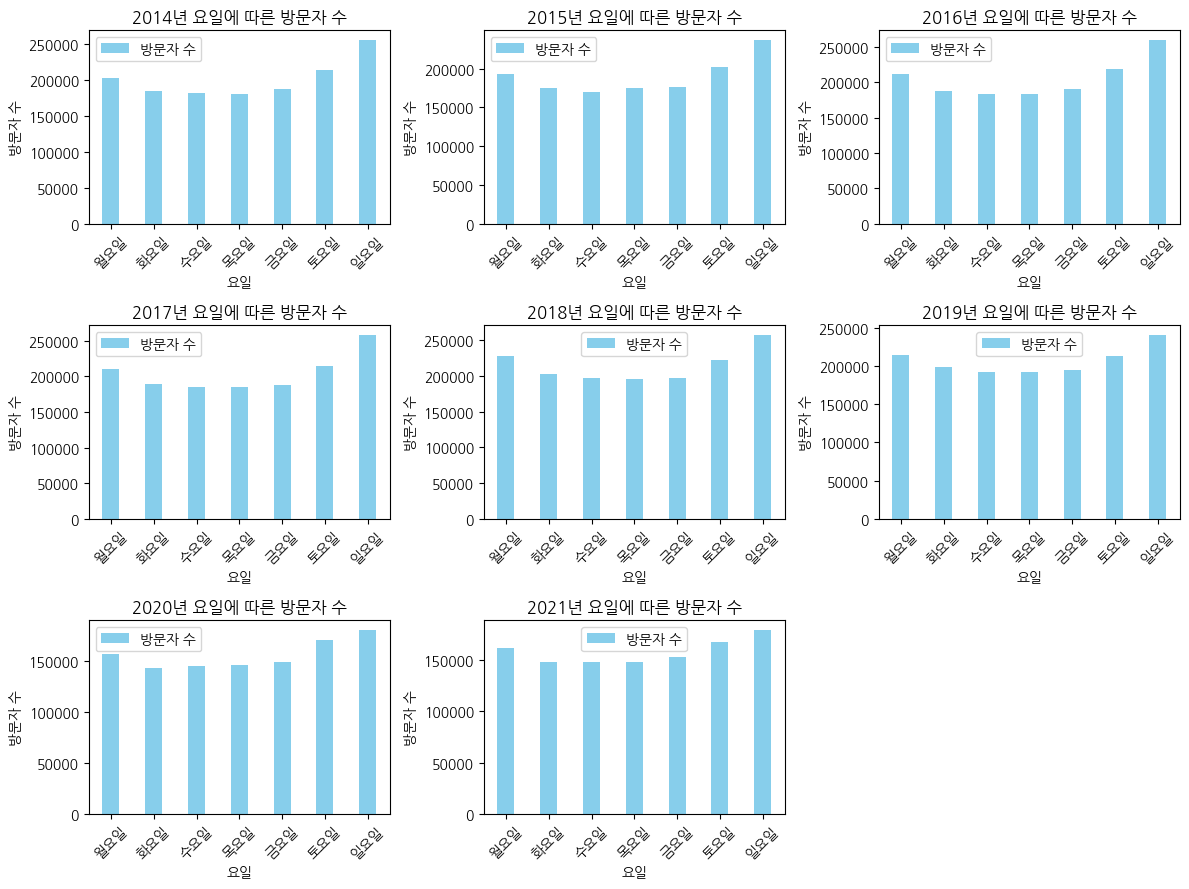

In [ ]:
# x축은 요일, y축은 이용량, 각 subpolot의 제목은 년도
day_ver2 = df_dw[1:3]
day_ver2 = day_ver2.drop(['연령별(1)','연령별(2)','성별(1)'],axis=1)
day_ver2 = day_ver2.transpose()

day_ver2.index = day_ver2.index.str.split('.').str[0].astype(int)
day_ver2 = day_ver2.reset_index()
day_ver2 = day_ver2.rename(columns={'index': '년도'})
day_ver2 = day_ver2.rename(columns={1: '요일', 2: '방문자수'})
day_ver2['방문자수'] = day_ver2['방문자수'].astype('int')
day_ver2

result = day_ver2.groupby(['년도','요일']).sum()
result

# 요일 index 순서 재배치
day_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
result = result.reindex(
    pd.MultiIndex.from_product([
        result.index.levels[0],   # '년도' 레벨 유지
        day_order                      # 요일 순서대로 정렬된 '요일' 레벨
    ], names=['년도', '요일'])
)

# 시각화
fig = plt.figure(figsize=(12,9))

for i, year in enumerate(result.index.levels[0]):  # '년도' 레벨로 순회
    plt.subplot(3, 3, i+1)
    plt.rcParams['font.family'] = 'NanumGothic'

    # 특정 년도 데이터를 필터링
    data = result.loc[year]

    # x 위치 설정 (요일을 리스트로 사용)
    x = range(len(data.index))
    day_labels = data.index  # 요일 레이블


    plt.bar(x,data['방문자수'], width=0.4, label='방문자 수', color='skyblue')
    # plt.ylim([data[['남자', '여자']].min().min() * 0.95, data[['남자', '여자']].max().max() * 1.05])

    # 그래프 제목, 축 레이블 설정
    plt.title(f'{year}년 요일에 따른 방문자 수')
    plt.xlabel('요일')
    plt.ylabel('방문자 수')
    plt.xticks(x, day_labels, rotation=45)  # x축 레이블을 요일로 설정
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 요일별 시각화
pred_df = df_day.drop(['2014','2015','2016','2017','2018','2019','2020','2021'],axis=1)

# 시각화 위해서 데이터프레임 전치
pred = pred_df.iloc[1:3]
pred.drop(['연령별(1)','연령별(2)','성별(1)'],axis=1,inplace=True)
pred = pred.transpose()
pred.rename(columns={1:'요일', 2:'이용량'},inplace=True)
pred['이용량'] = pred['이용량'].astype(int)
pred.dtypes
pred


<ipython-input-16-3271c71fe7fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred.drop(['연령별(1)','연령별(2)','성별(1)'],axis=1,inplace=True)


,이용량
2014.1,203602
2015.1,193389
2016.1,210967
2017.1,209695
2018.1,228160
2019.1,214108
2020.1,156788
2021.1,162064


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


# 요일별 데이터 분리
monday_data = pred[pred['요일'] == '월요일']['이용량']

# ARIMA 모델 학습
model = SARIMAX(monday_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()
result
# # 예측
# forecast = result.forecast(steps=12)  # 12개월 예측
# plt.plot(monday_data, label='Actual')
# plt.plot(forecast, label='Forecast', color='red')/
# plt.legend()
# plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


# 월별 이용량

In [ ]:
df_month

# 결측치 확인
df_month.isnull().sum()

# 필요한 data만 추출
# 각 년월별 이용자 수 합계
df_hap = df_month[df_month['성별(1)'] == '계']
df_hap = df_hap.drop(df_hap.index[-1])
df_hap = df_hap.drop(['연령별(1)','성별(1)'],axis=1)

# 데이터 타입 확인
df_hap.dtypes

,0
연령별(2),소계
2014. 01,117915
2014. 02,116865
2014. 03,111244
2014. 04,108266
...,...
2021. 08,104339
2021. 09,111540
2021. 10,103649
2021. 11,88555


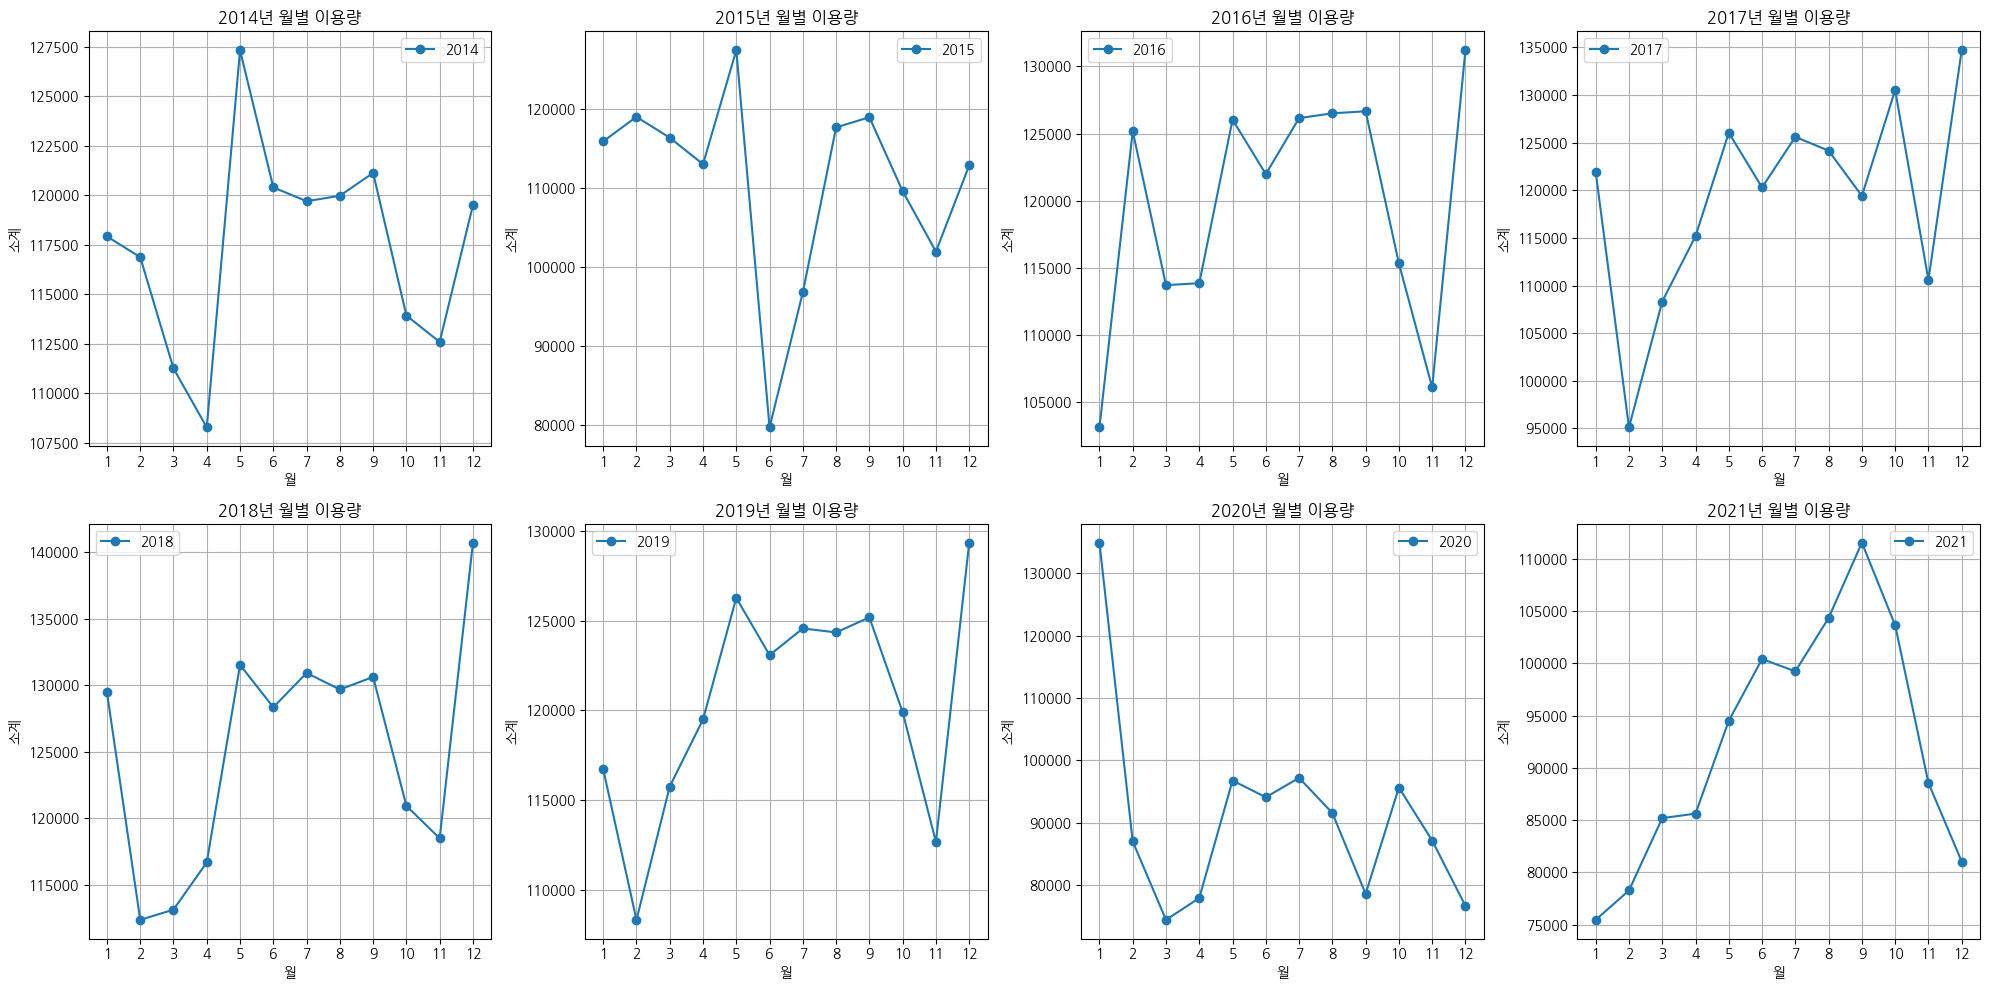

In [ ]:
# 2014 ~ 2021년 각 년도별 월 이용량 합계 추출
target_sum = df_hap.iloc[0,:]
target_sum = target_sum.reset_index()

# 첫번째 row를 컬럼으로 사용
header = target_sum.iloc[0]
target_sum = target_sum[1:]
target_sum.rename(columns=header, inplace=True)

# 1. 연도와 월 추출
target_sum['년도'] = target_sum['연령별(2)'].str.split('. ').str[0]
target_sum['월'] = target_sum['연령별(2)'].str.split('. ').str[1]

# 2. 데이터 타입 변환
target_sum['년도'] = target_sum['년도'].astype(int)
target_sum['월'] = target_sum['월'].astype(int)
target_sum['소계'] = target_sum['소계'].astype(int)
# 3. 년도별 데이터 분리
unique_years = target_sum['년도'].unique()

# 4. 시각화 설정
plt.figure(figsize=(20, 10))  # 큰 화면을 위해 설정

for i, year in enumerate(sorted(unique_years)):
    plt.subplot(2, 4, i + 1)  # 2행 4열로 배치
    year_data = target_sum[target_sum['년도'] == year]
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.plot(year_data['월'], year_data['소계'], marker='o', label=f"{year}")
    plt.title(f"{year}년 월별 이용량")
    plt.xlabel("월")
    plt.ylabel("소계")
    plt.xticks(range(1, 13))  # 월 표시
    plt.grid(True)
    plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [ ]:
# 2014년
df_month.iloc[:,3:15]

# 2015년
df_month.iloc[:,15:27]

# 2016년
df_month.iloc[:,27:39]

# 2017년
df_month.iloc[:,39:51]

# 2018년
df_month.iloc[:,51:63]

# 2019년
df_month.iloc[:,63:75]

# 2020년
df_month.iloc[:,75:87]

# 2021년
df_month.iloc[:,87:]

,2021. 01,2021. 02,2021. 03,2021. 04,2021. 05,2021. 06,2021. 07,2021. 08,2021. 09,2021. 10,2021. 11,2021. 12
0,75460,78276,85193,85622,94511,100409,99234,104339,111540,103649,88555,81038
1,37113,38335,41999,42742,46781,48819,48343,49320,52385,49478,43120,39459
2,38347,39941,43194,42880,47730,51590,50891,55019,59155,54171,45435,41579
3,975,1086,1274,1249,1370,1252,1161,1184,1323,1427,1411,1147
4,-,-,-,-,-,-,-,-,-,-,-,-
5,-,-,-,-,-,-,-,-,-,-,-,-
6,5538,6142,6794,7432,8320,7671,7175,6442,7534,8543,7818,6050
7,-,-,-,-,-,-,-,-,-,-,-,-
8,-,-,-,-,-,-,-,-,-,-,-,-
9,3337,3668,4476,4672,5041,5410,5089,5681,5736,5161,5226,4551
